In [1]:
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd, gluon, init, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

In [2]:
n_train = 20
n_test = 100
num_inputs = 200
true_w = nd.ones((num_inputs, 1))* 0.01
true_b = 0.05

features = nd.random.normal(shape=(n_train+n_test, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)
train_features = features[:n_train, :]
test_features = features[n_train:, :]
train_labels = labels[:n_train]
test_labels = labels[n_train:]

batch_size = 1
num_epochs = 100
lr = 0.003
net = d2l.linreg
loss = d2l.squared_loss
train_iter = gdata.DataLoader(gdata.ArrayDataset(
    train_features, train_labels), batch_size, shuffle=True)

In [3]:
def fit_and_plot_gluon(wd):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=1))
    trainer_w = gluon.Trainer(net.collect_params('.*weight'), 'sgd',
                             {'learning_rate':lr, 'wd':wd})
    trainer_b = gluon.Trainer(net.collect_params('.*bias'), 'sgd',
                             {'learning_rate':lr})
    train_ls = []
    test_ls = []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer_w.step(batch_size)
            trainer_b.step(batch_size)
        train_ls.append(loss(net(train_features),
                                train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),
                               test_labels).mean().asscalar())
    d2l.semilogy(range(1, num_epochs+1), train_ls, 'epochs', 'loss',
                range(1, num_epochs+1), test_ls, ['train', 'test'])
    print('L2 norm of w:', net[0].weight.data().norm().asscalar())

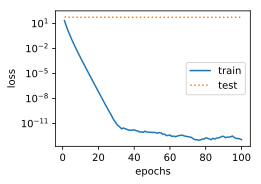

L2 norm of w: 11.61194


In [4]:
fit_and_plot_gluon(0)

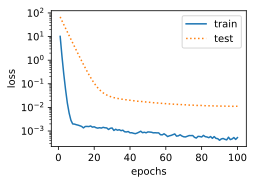

L2 norm of w: 0.041291445


In [5]:
fit_and_plot_gluon(3)